## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Pre-processing

In [74]:
# df is our processed data set to include one-hot encoding for genre
df = pd.read_csv('movie_genre_df.csv')
# df_genre includes relevant columns for each movie as well as one-hot encoding 
# for genre.
df_genre = df.iloc[:, 0:38]
df_genre.head()

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,['Drama'],9.3,Two imprisoned men bond over a number of years...,80.0,...,0,0,0,0,0,0,0,0,0,0
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"['Crime', 'Drama']",9.2,An organized crime dynasty's aging patriarch t...,100.0,...,0,0,0,0,0,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"['Action', 'Crime', 'Drama']",9.0,When the menace known as the Joker wreaks havo...,84.0,...,0,0,0,0,0,0,0,0,0,0
3,3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"['Crime', 'Drama']",9.0,The early life and career of Vito Corleone in ...,90.0,...,0,0,0,0,0,0,0,0,0,0
4,4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"['Crime', 'Drama']",9.0,A jury holdout attempts to prevent a miscarria...,96.0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_genre.columns
df_genre.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

In [76]:
all_genres = [
'Action',
'Adventure',
'Animation',
'Biography',
'Comedy',
'Crime',
'Drama',
'Family',
'Fantasy',
'Film-Noir',
'History',
'Horror',
'Music',
'Musical',
'Mystery',
'Romance',
'Sci-Fi',
'Sport',
'Thriller',
'War',
'Western'
]

# df_new includes a movie multiple times in the dataframe, once for each genre.
# For example, since The Dark Night falls into three genres, it will appear
# three times in df_new. 
df_new = pd.DataFrame()
for genre in all_genres:
  df_temp = pd.DataFrame()
  df_temp = df_temp.append(df_genre[df_genre[genre]==1])
  df_temp["Genre"] = genre
  df_new = df_new.append(df_temp)
df_new = df_new.dropna()
df_new = df_new.reset_index()
df_new.head()

,index,Unnamed: 0,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,...,0,0,0,0,0,0,0,0,0,0
1,5,5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,Action,8.9,Gandalf and Aragorn lead the World of Men agai...,...,0,0,0,0,0,0,0,0,0,0
2,8,8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,Action,8.8,A thief who steals corporate secrets through t...,...,0,0,0,0,0,1,0,0,0,0
3,10,10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,Action,8.8,A meek Hobbit from the Shire and eight compani...,...,0,0,0,0,0,0,0,0,0,0
4,13,13,https://m.media-amazon.com/images/M/MV5BZGMxZT...,The Lord of the Rings: The Two Towers,2002,UA,179 min,Action,8.7,While Frodo and Sam edge closer to Mordor with...,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_new.tail()

,index,Unnamed: 0,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
1825,691,691,https://m.media-amazon.com/images/M/MV5BMjIxND...,The Outlaw Josey Wales,1976,A,135 min,Western,7.8,Missouri farmer Josey Wales joins a Confederat...,...,0,0,0,0,0,0,0,0,0,1
1826,848,848,https://m.media-amazon.com/images/M/MV5BZGZmMW...,Blazing Saddles,1974,A,93 min,Western,7.7,"In order to ruin a western town, a corrupt pol...",...,0,0,0,0,0,0,0,0,0,1
1827,865,865,https://m.media-amazon.com/images/M/MV5BMzYyNz...,The Magnificent Seven,1960,Approved,128 min,Western,7.7,Seven gunfighters are hired by Mexican peasant...,...,0,0,0,0,0,0,0,0,0,1
1828,904,904,https://m.media-amazon.com/images/M/MV5BODhkZD...,True Grit,2010,PG-13,110 min,Western,7.6,A stubborn teenager enlists the help of a toug...,...,0,0,0,0,0,0,0,0,0,1
1829,990,990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157 min,Western,7.6,A low-life bandit and an I.R.A. explosives exp...,...,0,0,0,0,0,0,0,0,1,1


## Visualizations

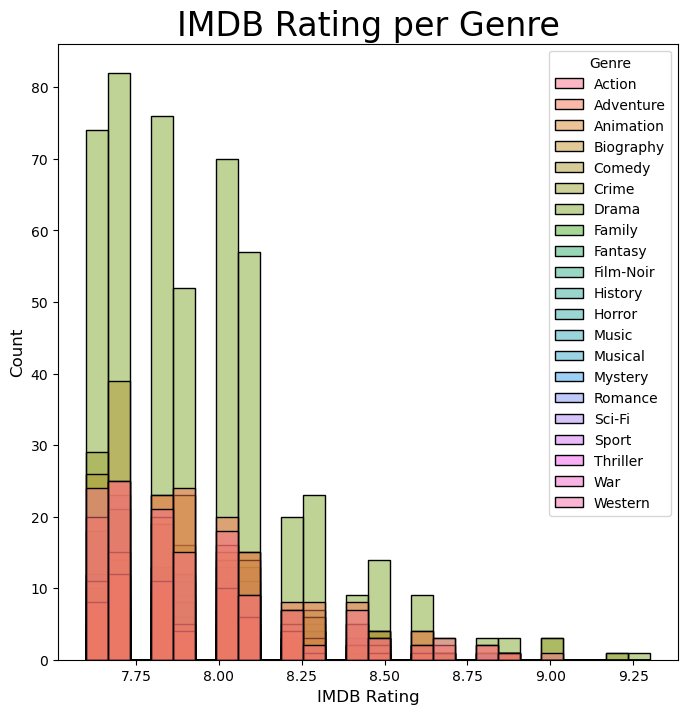

In [78]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df_new, x="IMDB_Rating", hue = "Genre")
plt.xlabel("IMDB Rating", size = 12)
plt.ylabel("Count", size = 12)
plt.title("IMDB Rating per Genre", size = 24)
plt.show()

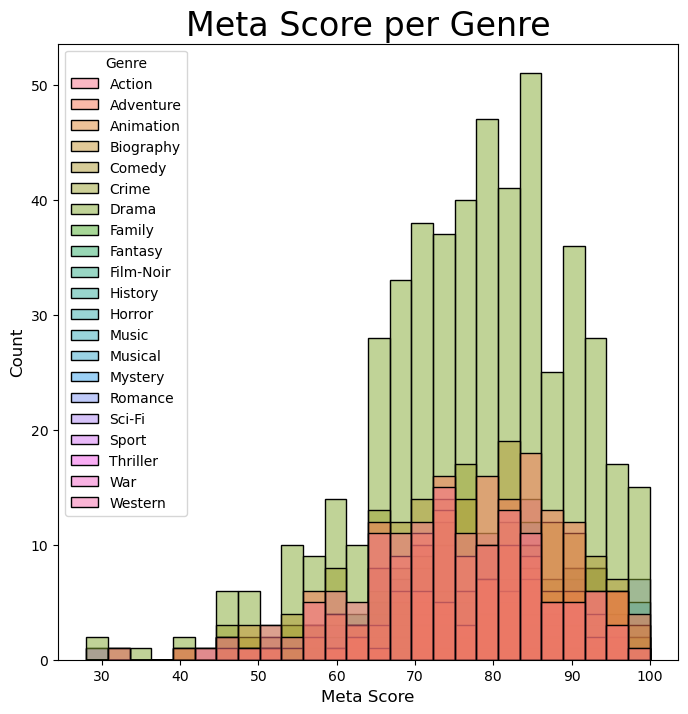

In [79]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df_new, x="Meta_score", hue="Genre")
plt.xlabel("Meta Score", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Meta Score per Genre", size = 24)
plt.show()

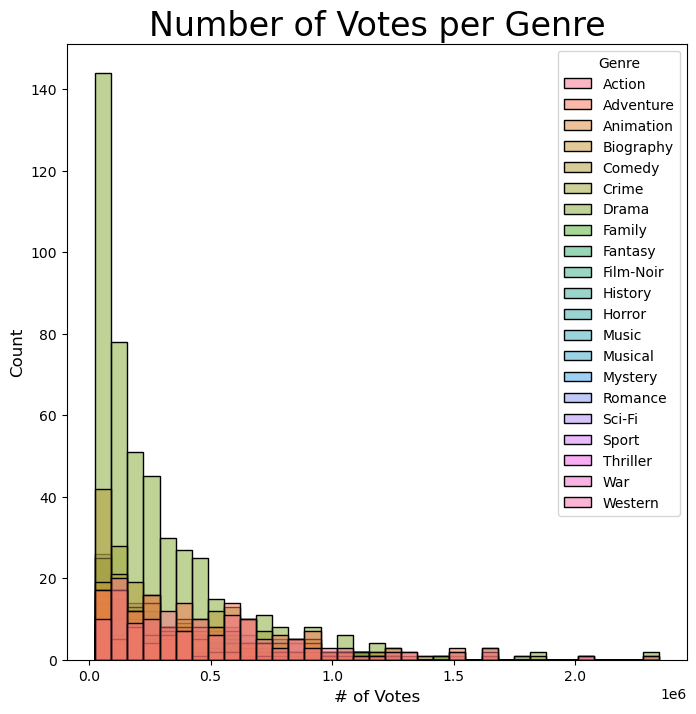

In [80]:
plt.figure(figsize=(8, 8))
sns.histplot(data=df_new, x="No_of_Votes", hue="Genre")
plt.xlabel("# of Votes", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Number of Votes per Genre", size = 24)
plt.show()

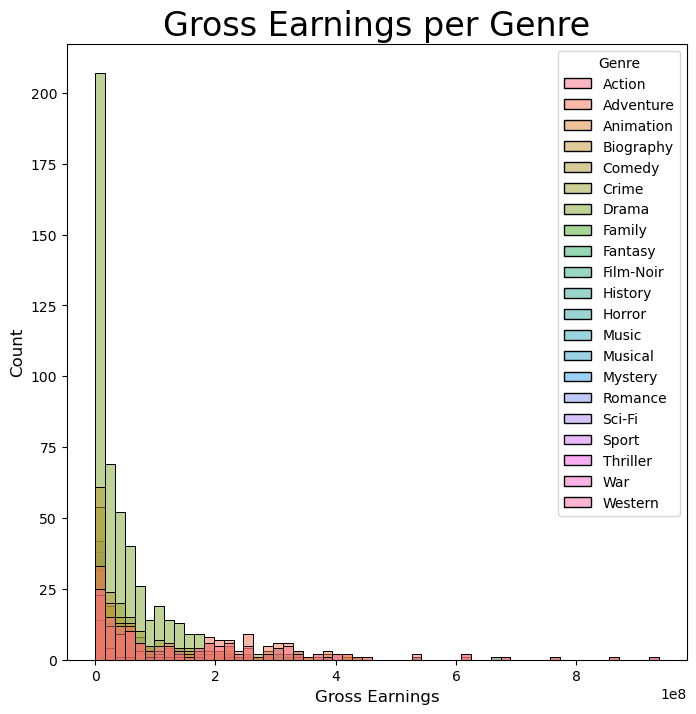

In [81]:
df_new["Gross"] = df_new["Gross"].str.replace(",", "")
df_new["Gross"] = df_new["Gross"].astype(int)

plt.figure(figsize=(8, 8))
sns.histplot(data=df_new, x="Gross", hue="Genre")
plt.xlabel("Gross Earnings", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Gross Earnings per Genre", size = 24)
plt.show()

<Figure size 800x800 with 0 Axes>

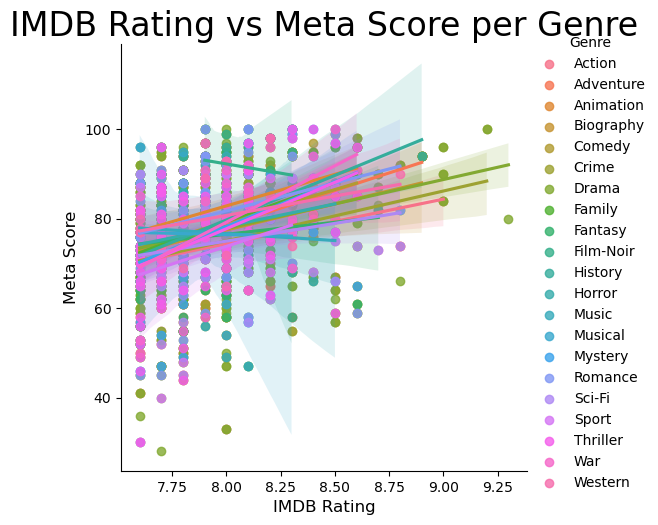

In [82]:
plt.figure(figsize=(8, 8))
sns.lmplot(data=df_new, x="IMDB_Rating", y="Meta_score", hue="Genre")
plt.xlabel("IMDB Rating", size = 12)
plt.ylabel("Meta Score", size = 12)
plt.title("IMDB Rating vs Meta Score per Genre", size = 24)
plt.show()

<Figure size 800x800 with 0 Axes>

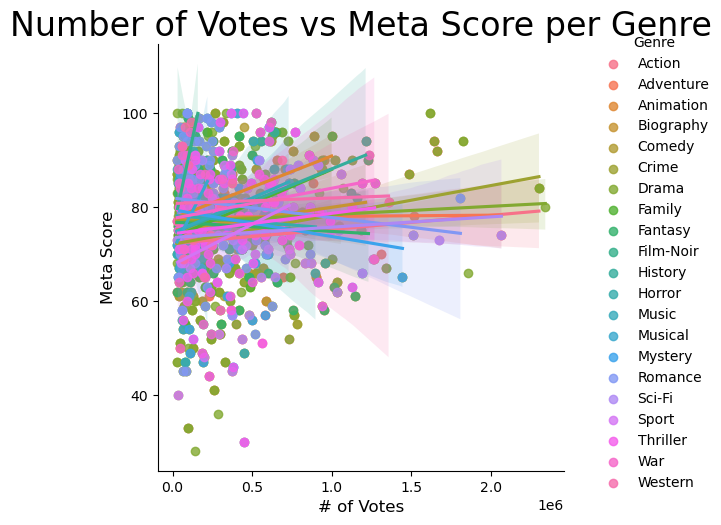

In [83]:
plt.figure(figsize=(8, 8))
sns.lmplot(data=df_new, x="No_of_Votes", y="Meta_score", hue="Genre")
plt.xlabel("# of Votes", size = 12)
plt.ylabel("Meta Score", size = 12)
plt.title("Number of Votes vs Meta Score per Genre", size = 24)
plt.show()

<Figure size 800x800 with 0 Axes>

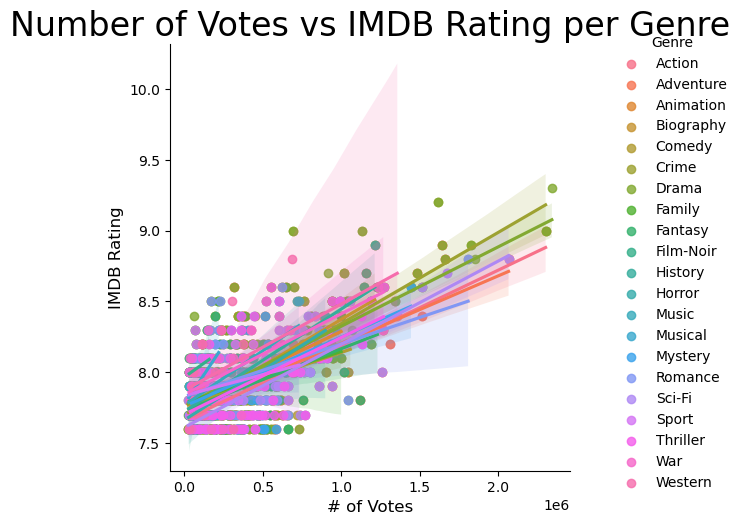

In [84]:
plt.figure(figsize=(8, 8))
sns.lmplot(data=df_new, x="No_of_Votes", y="IMDB_Rating", hue="Genre");
plt.xlabel("# of Votes", size = 12)
plt.ylabel("IMDB Rating", size = 12)
plt.title("Number of Votes vs IMDB Rating per Genre", size = 24)
plt.show()

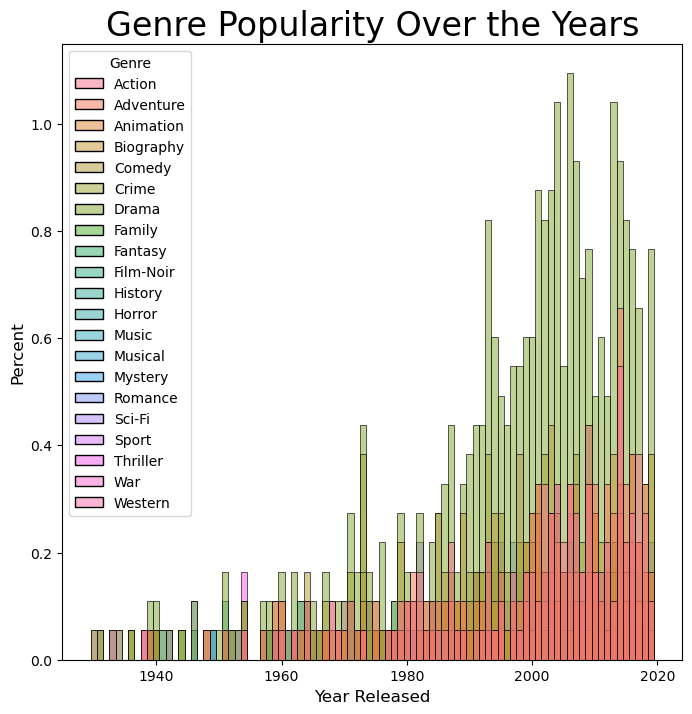

In [85]:
df_new = df_new[df_new["Released_Year"] != 'PG']

plt.figure(figsize=(8, 8))
sns.histplot(data=df_new, x="Released_Year", binwidth=10, stat='percent', hue="Genre")
plt.xlabel("Year Released", size = 12)
plt.ylabel("Percent", size = 12)
plt.title("Genre Popularity Over the Years", size = 24)
plt.show()

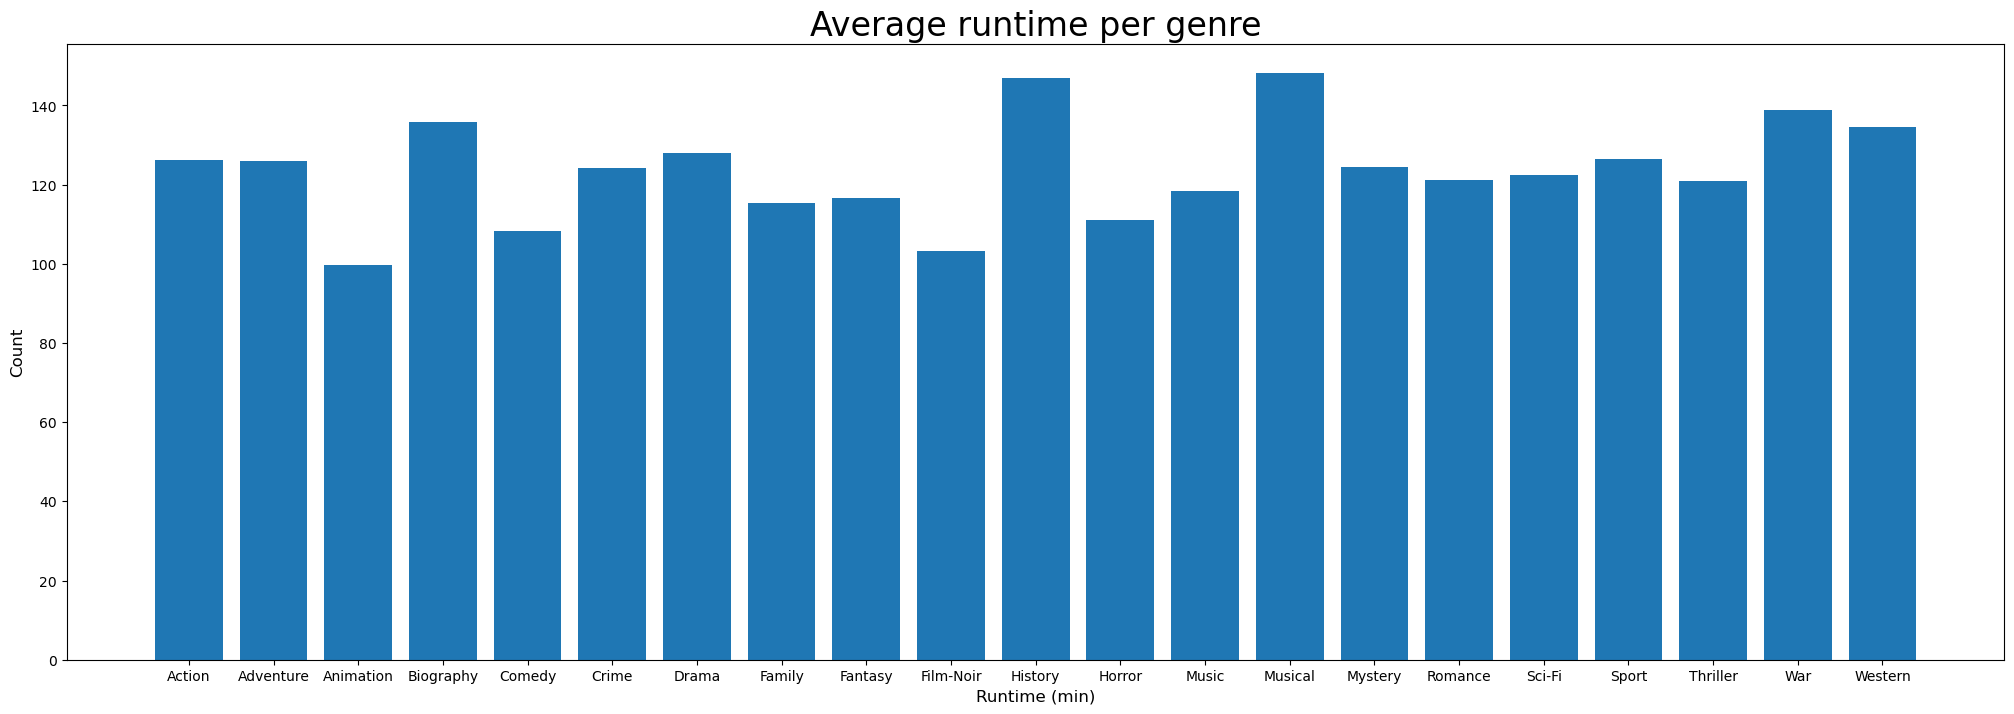

In [86]:
df_new["Runtime"] = df_new["Runtime"].str.replace(" min", "")
df_new["Runtime"] = df_new["Runtime"].astype(int)
avg_runtime = df_new.groupby("Genre")["Runtime"].mean()
avg_runtime = avg_runtime.to_frame().reset_index()
#avg_runtime = avg_runtime.set_index('Genre')

plt.figure(figsize=(25, 8))
plt.bar(avg_runtime["Genre"], avg_runtime['Runtime'])#, binwidth=1)
plt.xlabel("Runtime (min)", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Average runtime per genre", size = 24)
plt.show()

## Cosine Similarity

In [87]:
df_new['Meta_score'].isnull().values.any()

False

In [88]:
# Helper code for below function

stars_unique = df['Star1'].unique()
max_votes = df['No_of_Votes'].max()

In [89]:
# Function to determine best actor for a given genre, based on actor's previous IMDB ratings, Meta Scores and the number of votes received.


def genre_to_best_actor(genre):
    info = {'Star': [], 'Score': []}
    df_stars = pd.DataFrame(data=info)
    
    for star in stars_unique:
        
        score = 0
        
        #for "Star1" column
        for index, row in df_new.iterrows(): 
            
            if (row['Genre'] == genre and row['Star1'] == star):
                current_score = [(0.25 * (row['IMDB_Rating']/10)) + int(0.25 * (row['Meta_score']/100)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                #current_score = [(0.50 * (row['IMDB_Rating']/10)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                score = score + current_score[0] 
            
            else: 
                score = score

        #for "Star2" column
        for index, row in df_new.iterrows():
            
            if (row['Genre'] == genre and row['Star2'] == star):
                current_score = [(0.25 * (row['IMDB_Rating']/10)) + int(0.25 * (row['Meta_score']/100)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                #current_score = [(0.50 * (row['IMDB_Rating']/10)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                score = score + current_score[0] 
            
            else: 
                score = score

        #for "Star3" column
        for index, row in df_new.iterrows():
            
            if (row['Genre'] == genre and row['Star3'] == star):
                current_score = [(0.25 * (row['IMDB_Rating']/10)) + int(0.25 * (row['Meta_score']/100)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                #current_score = [(0.50 * (row['IMDB_Rating']/10)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                score = score + current_score[0] 
            
            else: 
                score = score

        #for "Star4" column
        for index, row in df_new.iterrows():
            
            if (row['Genre'] == genre and row['Star4'] == star):
                current_score = [(0.25 * (row['IMDB_Rating']/10)) + int(0.25 * (row['Meta_score']/100)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                #current_score = [(0.50 * (row['IMDB_Rating']/10)) + int(0.50 * (row['No_of_Votes']/max_votes))]
                score = score + current_score[0] 
            
            else: 
                score = score   
                             
        
        df_stars.loc[len(df_stars.index)] = [star, score]
        
    
    return df_stars['Star'].iloc[df_stars['Score'].idxmax()] 


In [90]:
genre_to_best_actor("Drama")

'Robert De Niro'

In [91]:
genre_to_best_actor("Action")

'Harrison Ford'

In [92]:
genre_to_best_actor("Romance")

'Ethan Hawke'

In [93]:
genre_to_best_actor("Comedy")

'Bill Murray'

In [94]:
genre_to_best_actor("Adventure")

'Ian McKellen'

In [95]:
# Recommender Function - To determine which movie is most similar to inputted movie, based on ratings, genre, (description)

# Using cosine similarity // doc2vec implementation

# https://newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity



df_rec = df_new.copy(deep=True)

df_rec['title'] = df_rec['Series_Title'].copy()



df_rec['Overview'].fillna('[]', inplace=True)


df_rec['Star1'].fillna('[]', inplace=True)


df_rec['Star1'] = df_rec['Star1'].apply(lambda x: ' '.join([i.replace(" ",'') for i in x]))


df_rec['tags'] = df_rec['Overview'] + ' ' + df_rec['Genre'] +  ' ' + df_rec['Series_Title'] + ' ' + df_rec['Star1']


df_final = df_rec[['index', 'title', 'tags']].copy()

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

vectorized_data = tfidf_vectorizer.fit_transform(df_rec['tags'].values)

In [97]:
vectorized_data

<1827x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 45576 stored elements in Compressed Sparse Row format>

In [98]:
vectorized_dataframe = pd.DataFrame(vectorized_data.toarray(), index=df_rec['tags'].index.tolist())

In [99]:
from sklearn.decomposition import TruncatedSVD


SVD = TruncatedSVD(n_components=3000)


reduced_data = SVD.fit_transform(vectorized_dataframe)


In [100]:
from sklearn.metrics.pairwise import cosine_similarity


similarity = cosine_similarity(reduced_data)

In [101]:
def recommendation(movie):
    id = df_genre[df_genre['Series_Title']==movie]['Unnamed: 0']
    distances = similarity[id.index[0]]
    movies = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:10]
    for i in movies:
        print(df_final.iloc[i[0]].title)

In [102]:
recommendation('The Godfather')

The Lord of the Rings: The Return of the King
The Lord of the Rings: The Return of the King
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Two Towers
The Lord of the Rings: The Two Towers
The Lord of the Rings: The Two Towers
X-Men: Days of Future Past


In [103]:
recommendation('Inception')

Shichinin no samurai
Shichinin no samurai
The Last Samurai
The Last Samurai
The Magnificent Seven
The Magnificent Seven
The Magnificent Seven
Skyfall
Seven Pounds


In [104]:
recommendation('True Grit')

The Martian
The Martian
Oldeuboi
Bacheha-Ye aseman
Oldeuboi
Oldeuboi
Bacheha-Ye aseman
Bacheha-Ye aseman
Moon


In [105]:
recommendation('The Magnificent Seven')

Hotel Rwanda
Hotel Rwanda
The Grand Budapest Hotel
The Grand Budapest Hotel
The Grand Budapest Hotel
A Hard Day's Night
A Hard Day's Night
A Hard Day's Night
The Shining


In [106]:
recommendation('The Dark Knight')

Inception
Inception
The Odd Couple
Wo hu cang long
Sicario
Waking Life
Waking Life
Waking Life
Gandhi


In [107]:
recommendation('The Lord of the Rings: The Two Towers')

Avengers: Endgame
Avengers: Endgame
Avengers: Infinity War
Avengers: Infinity War
Avengers: Infinity War
Captain America: Civil War
The Avengers
Captain America: Civil War
Captain America: Civil War
